In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [ ]:
# Load Data
data = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


# **Part - 1: Bar diagram, Ogive, Histogram, Pie chart,  box plot**

In [ ]:
# Extract Month
data['month'] = data['date'].dt.month

# Compute Monthly Means
monthly_mean_temp = data.groupby('month')['meantemp'].mean().reset_index()
monthly_mean_humidity = data.groupby('month')['humidity'].mean().reset_index()
monthly_mean_wind_speed = data.groupby('month')['wind_speed'].mean().reset_index()
monthly_mean_pressure = data.groupby('month')['meanpressure'].mean().reset_index()

# Month Labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create Subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Mean Temperature by Month', 'Humidity by Month', 'Wind Speed by Month', 'Mean Pressure by Month']
)

# Add Traces with Solid Colors and Borders
fig.add_trace(go.Bar(
    x=month_names, y=monthly_mean_temp['meantemp'],
    marker=dict(color='red', line=dict(color='black', width=1))  # Solid red color with black border
), row=1, col=1)

fig.add_trace(go.Bar(
    x=month_names, y=monthly_mean_humidity['humidity'],
    marker=dict(color='blue', line=dict(color='black', width=1))  # Solid blue color with black border
), row=1, col=2)

fig.add_trace(go.Bar(
    x=month_names, y=monthly_mean_wind_speed['wind_speed'],
    marker=dict(color='green', line=dict(color='black', width=1))  # Solid green color with black border
), row=2, col=1)

fig.add_trace(go.Bar(
    x=month_names, y=monthly_mean_pressure['meanpressure'],
    marker=dict(color='purple', line=dict(color='black', width=1))  # Solid purple color with black border
), row=2, col=2)

# Update Layout
fig.update_layout(
    title_text='Bar Plots on Monthly Climate Data',
    showlegend=False,
    width=1200,
    height=800
)

# Show Figure
fig.show()

In [ ]:
# Function to Compute Cumulative Frequency
def compute_cumulative_freq(series):
    sorted_data = np.sort(series)
    cumulative_freq = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cumulative_freq

# Compute Cumulative Frequency for Each Variable
temp_values, temp_cum_freq = compute_cumulative_freq(data['meantemp'])
humidity_values, humidity_cum_freq = compute_cumulative_freq(data['humidity'])
wind_values, wind_cum_freq = compute_cumulative_freq(data['wind_speed'])
pressure_values, pressure_cum_freq = compute_cumulative_freq(data['meanpressure'])

# Create Subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Ogive of Mean Temperature', 'Ogive of Humidity', 'Ogive of Wind Speed', 'Ogive of Mean Pressure']
)

# Add Ogive Plots with Solid Colors and Borders
fig.add_trace(go.Scatter(
    x=temp_values, y=temp_cum_freq,
    mode='lines+markers',
    line=dict(color='red', width=2),
    marker=dict(color='red')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=humidity_values, y=humidity_cum_freq,
    mode='lines+markers',
    line=dict(color='blue', width=2),
    marker=dict(color='blue')
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=wind_values, y=wind_cum_freq,
    mode='lines+markers',
    line=dict(color='green', width=2),
    marker=dict(color='green')
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=pressure_values, y=pressure_cum_freq,
    mode='lines+markers',
    line=dict(color='purple', width=2),
    marker=dict(color='purple')
), row=2, col=2)

# Update Layout
fig.update_layout(
    title_text='Cumulative Frequency (Ogive) Plots for Climate Data',
    showlegend=False,
    width=1200,
    height=800
)

# Show Figure
fig.show()

In [ ]:
# Create Subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        'Histogram of Mean Temperature',
        'Histogram of Humidity',
        'Histogram of Wind Speed',
        'Histogram of Mean Pressure'
    ]
)

# Histogram (Mean Temperature)
fig.add_trace(go.Histogram(
    x=data['meantemp'],
    marker=dict(color='red', line=dict(color='black', width=1)),  # Added border
    nbinsx=20
), row=1, col=1)

# Histogram (Humidity)
fig.add_trace(go.Histogram(
    x=data['humidity'],
    marker=dict(color='blue', line=dict(color='black', width=1)),  # Added border
    nbinsx=20
), row=1, col=2)

# Histogram (Wind Speed)
fig.add_trace(go.Histogram(
    x=data['wind_speed'],
    marker=dict(color='green', line=dict(color='black', width=1)),  # Added border
    nbinsx=20
), row=2, col=1)

# Histogram (Mean Pressure)
fig.add_trace(go.Histogram(
    x=data['meanpressure'],
    marker=dict(color='purple', line=dict(color='black', width=1)),  # Added border
    nbinsx=20
), row=2, col=2)

# Update Layout
fig.update_layout(
    title_text='Histograms of Climate Data',
    showlegend=False,
    width=1300,
    height=800
)

# Show Figure
fig.show()

In [ ]:
categories = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
colors = ['blue', 'green', 'yellow', 'orange', 'red']

# Get Min & Max Values for Each Variable
temp_min, temp_max = data['meantemp'].min(), data['meantemp'].max()
humidity_min, humidity_max = data['humidity'].min(), data['humidity'].max()
wind_min, wind_max = data['wind_speed'].min(), data['wind_speed'].max()
pressure_min, pressure_max = data['meanpressure'].min(), data['meanpressure'].max()

# Ensure Bins Are Monotonic
temp_bins = [temp_min, temp_min + (temp_max - temp_min) * 0.2, temp_min + (temp_max - temp_min) * 0.4,
             temp_min + (temp_max - temp_min) * 0.6, temp_min + (temp_max - temp_min) * 0.8, temp_max]

humidity_bins = [humidity_min, humidity_min + (humidity_max - humidity_min) * 0.2, humidity_min + (humidity_max - humidity_min) * 0.4,
                 humidity_min + (humidity_max - humidity_min) * 0.6, humidity_min + (humidity_max - humidity_min) * 0.8, humidity_max]

wind_bins = [wind_min, wind_min + (wind_max - wind_min) * 0.2, wind_min + (wind_max - wind_min) * 0.4,
             wind_min + (wind_max - wind_min) * 0.6, wind_min + (wind_max - wind_min) * 0.8, wind_max]

pressure_bins = [pressure_min, pressure_min + (pressure_max - pressure_min) * 0.2, pressure_min + (pressure_max - pressure_min) * 0.4,
                 pressure_min + (pressure_max - pressure_min) * 0.6, pressure_min + (pressure_max - pressure_min) * 0.8, pressure_max]

# Categorize Data
data['temp_category'] = pd.cut(data['meantemp'], bins=temp_bins, labels=categories, include_lowest=True)
data['humidity_category'] = pd.cut(data['humidity'], bins=humidity_bins, labels=categories, include_lowest=True)
data['wind_category'] = pd.cut(data['wind_speed'], bins=wind_bins, labels=categories, include_lowest=True)
data['pressure_category'] = pd.cut(data['meanpressure'], bins=pressure_bins, labels=categories, include_lowest=True)

# Count Values for Each Category
temp_counts = data['temp_category'].value_counts().reindex(categories, fill_value=0)
humidity_counts = data['humidity_category'].value_counts().reindex(categories, fill_value=0)
wind_counts = data['wind_category'].value_counts().reindex(categories, fill_value=0)
pressure_counts = data['pressure_category'].value_counts().reindex(categories, fill_value=0)

# Create Pie Chart Subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]],
    subplot_titles=['Temperature Distribution', 'Humidity Distribution', 'Wind Speed Distribution', 'Pressure Distribution']
)

# Add Pie Charts
fig.add_trace(go.Pie(
    labels=categories,
    values=temp_counts,
    marker=dict(colors=colors, line=dict(color='black', width=1)),
), row=1, col=1)

fig.add_trace(go.Pie(
    labels=categories,
    values=humidity_counts,
    marker=dict(colors=colors, line=dict(color='black', width=1)),
), row=1, col=2)

fig.add_trace(go.Pie(
    labels=categories,
    values=wind_counts,
    marker=dict(colors=colors, line=dict(color='black', width=1)),
), row=2, col=1)

fig.add_trace(go.Pie(
    labels=categories,
    values=pressure_counts,
    marker=dict(colors=colors, line=dict(color='black', width=1)),
), row=2, col=2)

# Update Layout
fig.update_layout(
    title_text='Climate Data Distribution by Categories',
    showlegend=True,
    width=1000,
    height=800
)

# Show Figure
fig.show()

In [ ]:
# Create Subplots for Box Plots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Box Plot of Mean Temperature', 'Box Plot of Humidity', 'Box Plot of Wind Speed', 'Box Plot of Mean Pressure']
)

# Box Plots with Solid Colors and Borders
fig.add_trace(go.Box(
    y=data['meantemp'],
    boxpoints='all',  # Show individual points
    jitter=0.3,
    marker=dict(color='red'),
    name='Mean Temperature'
), row=1, col=1)

fig.add_trace(go.Box(
    y=data['humidity'],
    boxpoints='all',
    jitter=0.3,
    marker=dict(color='blue'),
    name='Humidity'
), row=1, col=2)

fig.add_trace(go.Box(
    y=data['wind_speed'],
    boxpoints='all',
    jitter=0.3,
    marker=dict(color='green'),
    name='Wind Speed'
), row=2, col=1)

fig.add_trace(go.Box(
    y=data['meanpressure'],
    boxpoints='all',
    jitter=0.3,
    marker=dict(color='purple'),
    name='Mean Pressure'
), row=2, col=2)

# Update Layout
fig.update_layout(
    title_text='Box Plots for Climate Data',
    showlegend=False,
    width=1200,
    height=800
)

# Show Figure
fig.show()

# **Part - 2: Descriptive summary of the Data**

**Statistical Analysis: Central Tendency & Dispersion**

**Central Tendency** (Measures the center of the data)

**- Mean:** The average temperature over time.

**- Median:** The middle value, which is less affected by outliers.

**- Quartiles:** These divide the data into four parts, providing insights into the spread.

**Dispersion** (Measures the spread of the data)

**- Standard Deviation:** Shows the average deviation from the mean.

**- Variance:** Represents the squared deviations from the mean.

**- Range:** The difference between the highest and lowest temperature.

Both central tendency and dispersion are important in understanding the distribution of temperature data. Central tendency gives an idea of the typical value, while dispersion tells us how much variation exists in the data.

In [ ]:
def generate_statistics_table(data, column_name, unit):
    """Generates a PrettyTable for descriptive statistics of a given column."""
    mean_val = data[column_name].mean()
    median_val = data[column_name].median()
    quartiles = data[column_name].quantile([0.25, 0.5, 0.75])
    std_dev = data[column_name].std()
    variance = data[column_name].var()
    range_val = data[column_name].max() - data[column_name].min()
    iqr = quartiles[0.75] - quartiles[0.25]  # Interquartile Range

    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ["Statistic", f"Value ({unit})"]
    table.add_row([f"Mean {column_name.capitalize()}", f"{mean_val:.2f}"])
    table.add_row([f"Median {column_name.capitalize()}", f"{median_val:.2f}"])
    table.add_row(["Q1 (25th Percentile)", f"{quartiles[0.25]:.2f}"])
    table.add_row(["Q2 (50th Percentile - Median)", f"{quartiles[0.5]:.2f}"])
    table.add_row(["Q3 (75th Percentile)", f"{quartiles[0.75]:.2f}"])
    table.add_row(["Interquartile Range (IQR)", f"{iqr:.2f}"])
    table.add_row(["Standard Deviation", f"{std_dev:.2f}"])
    table.add_row(["Variance", f"{variance:.2f}"])
    table.add_row(["Range", f"{range_val:.2f}"])

    return table

In [ ]:
# Generate and print tables for each variable
print("Average Temperature Statistics")
print(generate_statistics_table(data, 'meantemp', '°C'))

Average Temperature Statistics
+-------------------------------+------------+
|           Statistic           | Value (°C) |
+-------------------------------+------------+
|         Mean Meantemp         |   25.50    |
|        Median Meantemp        |   27.71    |
|      Q1 (25th Percentile)     |   18.86    |
| Q2 (50th Percentile - Median) |   27.71    |
|      Q3 (75th Percentile)     |   31.31    |
|   Interquartile Range (IQR)   |   12.45    |
|       Standard Deviation      |    7.35    |
|            Variance           |   53.99    |
|             Range             |   32.71    |
+-------------------------------+------------+


In [ ]:
print("Humidity Statistics")
print(generate_statistics_table(data, 'humidity', '%'))

Humidity Statistics
+-------------------------------+-----------+
|           Statistic           | Value (%) |
+-------------------------------+-----------+
|         Mean Humidity         |   60.77   |
|        Median Humidity        |   62.62   |
|      Q1 (25th Percentile)     |   50.38   |
| Q2 (50th Percentile - Median) |   62.62   |
|      Q3 (75th Percentile)     |   72.22   |
|   Interquartile Range (IQR)   |   21.84   |
|       Standard Deviation      |   16.77   |
|            Variance           |   281.22  |
|             Range             |   86.57   |
+-------------------------------+-----------+


In [ ]:
print("\nWind Speed Statistics")
print(generate_statistics_table(data, 'wind_speed', 'km/h'))


Wind Speed Statistics
+-------------------------------+--------------+
|           Statistic           | Value (km/h) |
+-------------------------------+--------------+
|        Mean Wind_speed        |     6.80     |
|       Median Wind_speed       |     6.22     |
|      Q1 (25th Percentile)     |     3.48     |
| Q2 (50th Percentile - Median) |     6.22     |
|      Q3 (75th Percentile)     |     9.24     |
|   Interquartile Range (IQR)   |     5.76     |
|       Standard Deviation      |     4.56     |
|            Variance           |    20.81     |
|             Range             |    42.22     |
+-------------------------------+--------------+


In [ ]:
print("\nMean Pressure Statistics")
print(generate_statistics_table(data, 'meanpressure', 'hPa'))


Mean Pressure Statistics
+-------------------------------+-------------+
|           Statistic           | Value (hPa) |
+-------------------------------+-------------+
|       Mean Meanpressure       |   1011.10   |
|      Median Meanpressure      |   1008.56   |
|      Q1 (25th Percentile)     |   1001.58   |
| Q2 (50th Percentile - Median) |   1008.56   |
|      Q3 (75th Percentile)     |   1014.94   |
|   Interquartile Range (IQR)   |    13.36    |
|       Standard Deviation      |    180.23   |
|            Variance           |   32483.45  |
|             Range             |   7682.38   |
+-------------------------------+-------------+


# **Part - 3: Using CLT to estimate distribution of Sample Mean**

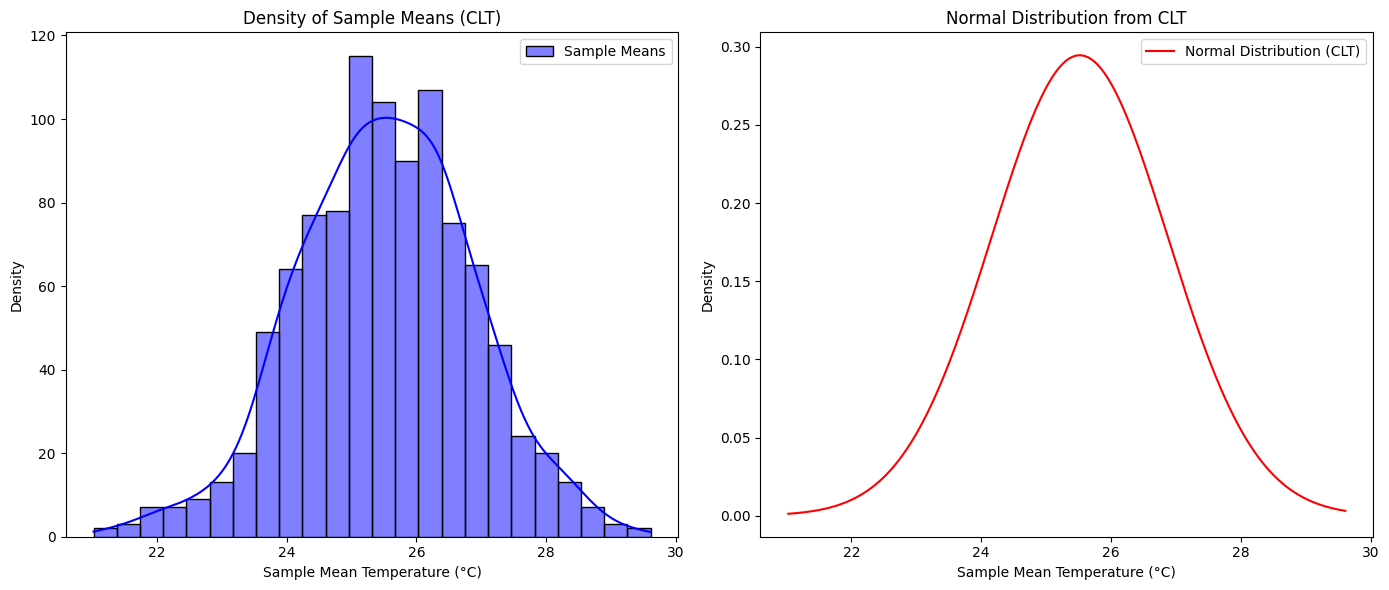

Mean of Sample Means: 25.52 °C
Standard Deviation of Sample Means: 1.35 °C


In [ ]:
from scipy.stats import norm

# Apply CLT to approximate the distribution of the sample mean
sample_size = 30
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = data['meantemp'].sample(sample_size, replace=True)
    sample_means.append(sample.mean())

mean_of_means = np.mean(sample_means)
std_of_means = np.std(sample_means)

# Generate the normal distribution based on CLT
x = np.linspace(min(sample_means), max(sample_means), 1000)
normal_dist = norm.pdf(x, mean_of_means, std_of_means)

plt.figure(figsize=(14, 6))

# Plot the histogram of sample means
plt.subplot(1, 2, 1)
sns.histplot(sample_means, kde=True, color='blue', label='Sample Means')
plt.title('Density of Sample Means (CLT)')
plt.xlabel('Sample Mean Temperature (°C)')
plt.ylabel('Density')
plt.legend()

# Plot the normal distribution
plt.subplot(1, 2, 2)
plt.plot(x, normal_dist, color='red', label='Normal Distribution (CLT)')
plt.title('Normal Distribution from CLT')
plt.xlabel('Sample Mean Temperature (°C)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Insights based on the CLT
print(f"Mean of Sample Means: {np.mean(sample_means):.2f} °C")
print(f"Standard Deviation of Sample Means: {np.std(sample_means):.2f} °C")

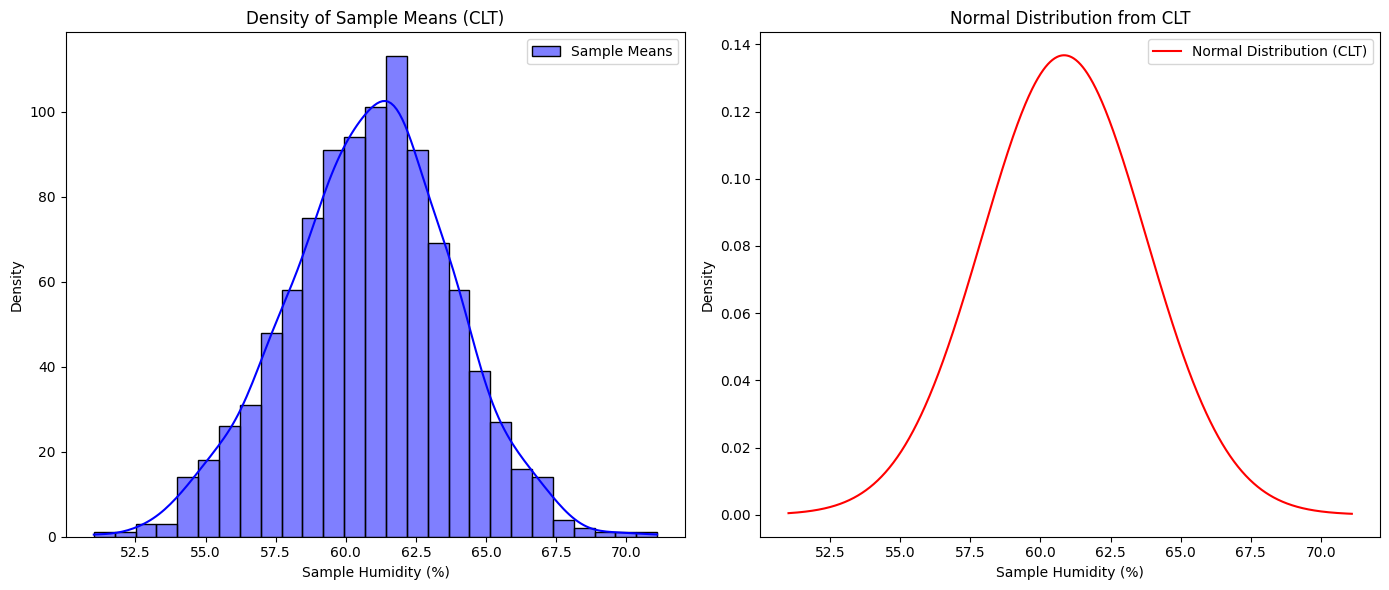

Mean of Sample Means: 60.84 %
Standard Deviation of Sample Means: 2.92 %


In [ ]:
from scipy.stats import norm

# Apply CLT to approximate the distribution of the sample mean
sample_size = 30
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = data['humidity'].sample(sample_size, replace=True)
    sample_means.append(sample.mean())

mean_of_means = np.mean(sample_means)
std_of_means = np.std(sample_means)

# Generate the normal distribution based on CLT
x = np.linspace(min(sample_means), max(sample_means), 1000)
normal_dist = norm.pdf(x, mean_of_means, std_of_means)

plt.figure(figsize=(14, 6))

# Plot the histogram of sample means
plt.subplot(1, 2, 1)
sns.histplot(sample_means, kde=True, color='blue', label='Sample Means')
plt.title('Density of Sample Means (CLT)')
plt.xlabel('Sample Humidity (%)')
plt.ylabel('Density')
plt.legend()

# Plot the normal distribution
plt.subplot(1, 2, 2)
plt.plot(x, normal_dist, color='red', label='Normal Distribution (CLT)')
plt.title('Normal Distribution from CLT')
plt.xlabel('Sample Humidity (%)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Insights based on the CLT
print(f"Mean of Sample Means: {np.mean(sample_means):.2f} %")
print(f"Standard Deviation of Sample Means: {np.std(sample_means):.2f} %")

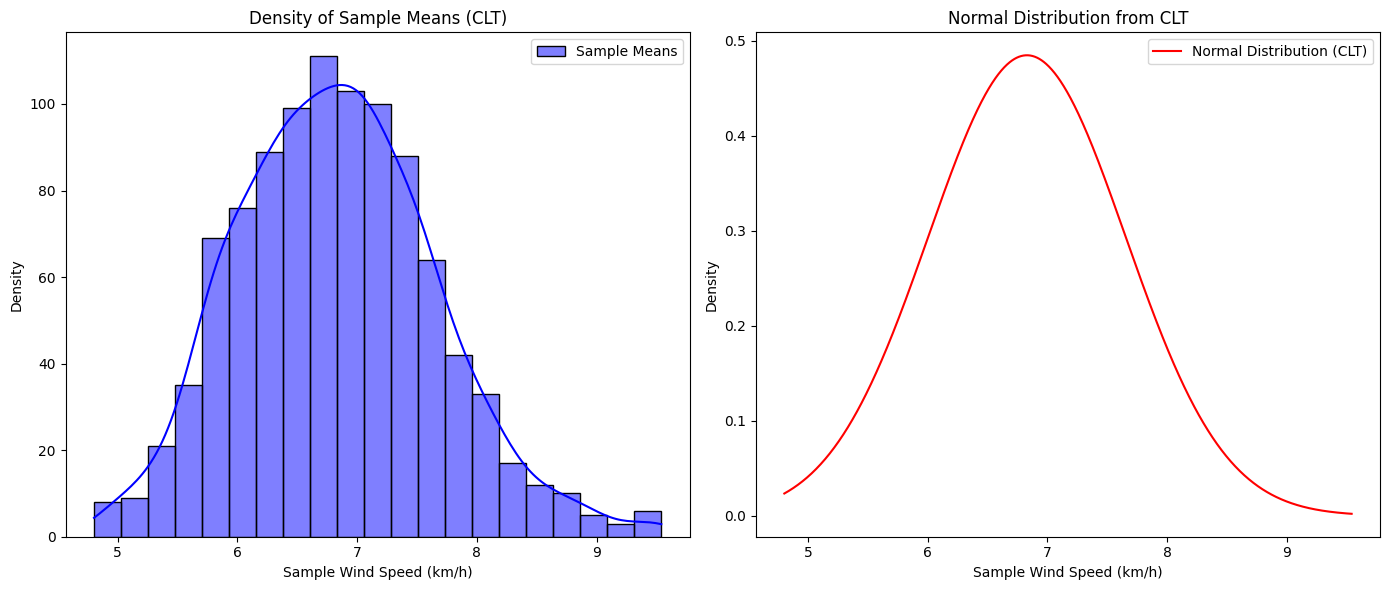

Mean of Sample Means: 6.83 km/h
Standard Deviation of Sample Means: 0.82 km/h


In [ ]:
from scipy.stats import norm

# Apply CLT to approximate the distribution of the sample mean
sample_size = 30
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = data['wind_speed'].sample(sample_size, replace=True)
    sample_means.append(sample.mean())

mean_of_means = np.mean(sample_means)
std_of_means = np.std(sample_means)

# Generate the normal distribution based on CLT
x = np.linspace(min(sample_means), max(sample_means), 1000)
normal_dist = norm.pdf(x, mean_of_means, std_of_means)

plt.figure(figsize=(14, 6))

# Plot the histogram of sample means
plt.subplot(1, 2, 1)
sns.histplot(sample_means, kde=True, color='blue', label='Sample Means')
plt.title('Density of Sample Means (CLT)')
plt.xlabel('Sample Wind Speed (km/h)')
plt.ylabel('Density')
plt.legend()

# Plot the normal distribution
plt.subplot(1, 2, 2)
plt.plot(x, normal_dist, color='red', label='Normal Distribution (CLT)')
plt.title('Normal Distribution from CLT')
plt.xlabel('Sample Wind Speed (km/h)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Insights based on the CLT
print(f"Mean of Sample Means: {np.mean(sample_means):.2f} km/h")
print(f"Standard Deviation of Sample Means: {np.std(sample_means):.2f} km/h")

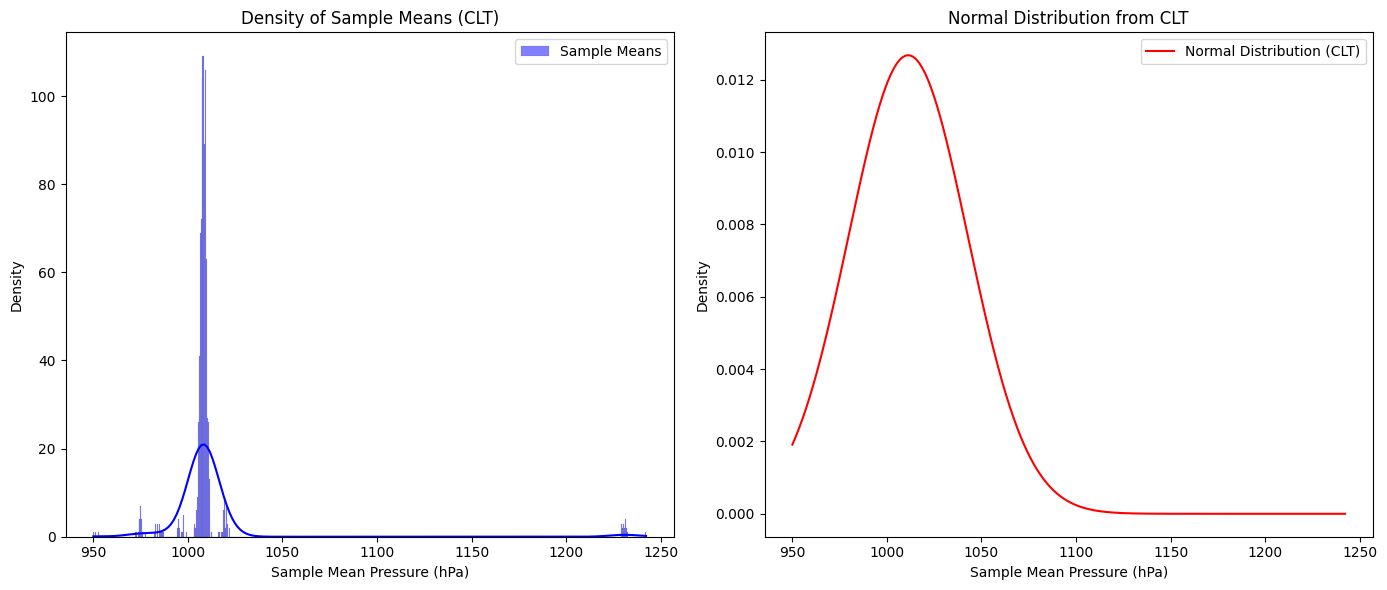

Mean of Sample Means: 1011.29 hPa
Standard Deviation of Sample Means: 31.47 hPa


In [ ]:
from scipy.stats import norm

# Apply CLT to approximate the distribution of the sample mean
sample_size = 30
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = data['meanpressure'].sample(sample_size, replace=True)
    sample_means.append(sample.mean())

mean_of_means = np.mean(sample_means)
std_of_means = np.std(sample_means)

# Generate the normal distribution based on CLT
x = np.linspace(min(sample_means), max(sample_means), 1000)
normal_dist = norm.pdf(x, mean_of_means, std_of_means)

plt.figure(figsize=(14, 6))

# Plot the histogram of sample means
plt.subplot(1, 2, 1)
sns.histplot(sample_means, kde=True, color='blue', label='Sample Means')
plt.title('Density of Sample Means (CLT)')
plt.xlabel('Sample Mean Pressure (hPa)')
plt.ylabel('Density')
plt.legend()

# Plot the normal distribution
plt.subplot(1, 2, 2)
plt.plot(x, normal_dist, color='red', label='Normal Distribution (CLT)')
plt.title('Normal Distribution from CLT')
plt.xlabel('Sample Mean Pressure (hPa)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Insights based on the CLT
print(f"Mean of Sample Means: {np.mean(sample_means):.2f} hPa")
print(f"Standard Deviation of Sample Means: {np.std(sample_means):.2f} hPa")

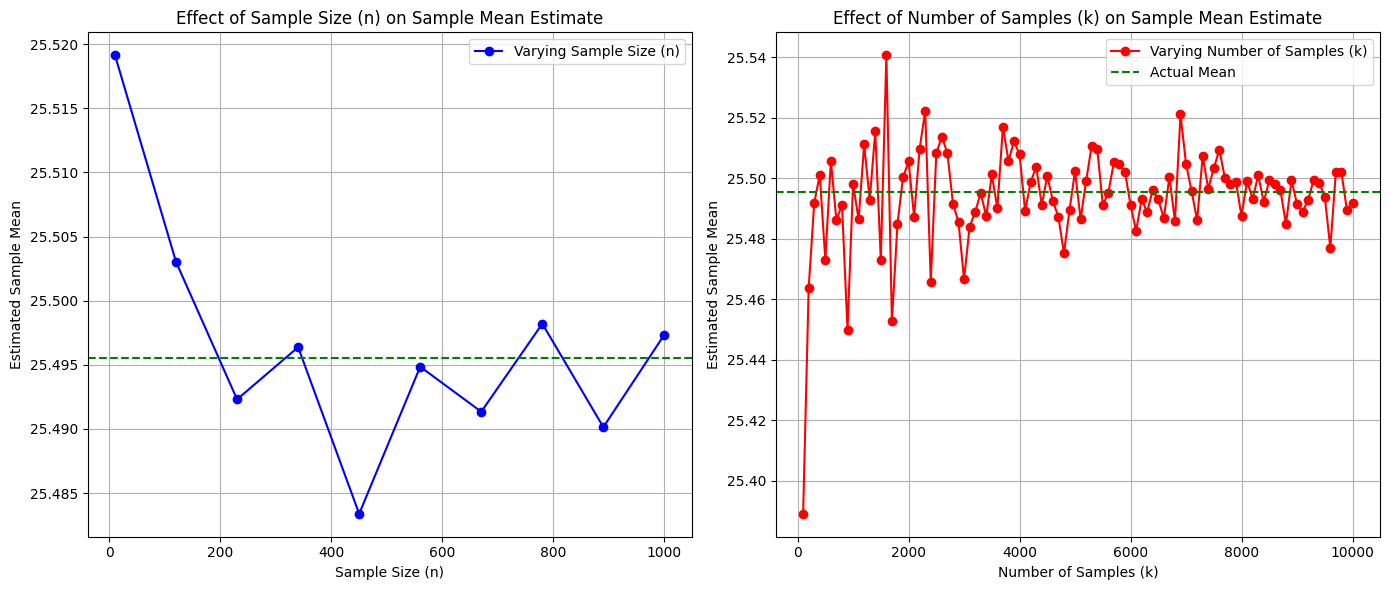

In [ ]:
actual_mean = data['meantemp'].mean()
actual_std = data['meantemp'].std()

# Define sample sizes and number of samples to test
sample_sizes = np.linspace(10, 1000, 10, dtype=int) # Different values of n
num_samples_list = np.linspace(100, 10000, 100, dtype=int)  # Different values of k

# Fixed parameters
fixed_k = 1000  # Fix num_samples for sample size variation
fixed_n = 100  # Fix sample_size for num_samples variation

# Store results
sample_size_means = []
num_samples_means = []

# Vary sample size (n), fix k
for n in sample_sizes:
    sample_means = [data['meantemp'].sample(n, replace=True).mean() for _ in range(fixed_k)]
    sample_size_means.append(np.mean(sample_means))

# Vary number of samples (k), fix n
for k in num_samples_list:
    sample_means = [data['meantemp'].sample(fixed_n, replace=True).mean() for _ in range(k)]
    num_samples_means.append(np.mean(sample_means))

plt.figure(figsize=(14, 6))

# Plot for Sample Size Variation (n)
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, sample_size_means, marker='o', linestyle='-', color='blue', label='Varying Sample Size (n)')
plt.xlabel("Sample Size (n)")
plt.ylabel("Estimated Sample Mean")
plt.title("Effect of Sample Size (n) on Sample Mean Estimate")
plt.grid(True)
plt.legend()
plt.axhline(y=actual_mean, color='green', linestyle='--', label='Actual Mean')

# Plot for Number of Samples Variation (k)
plt.subplot(1, 2, 2)
plt.plot(num_samples_list, num_samples_means, marker='o', linestyle='-', color='red', label='Varying Number of Samples (k)')
plt.xlabel("Number of Samples (k)")
plt.ylabel("Estimated Sample Mean")
plt.title("Effect of Number of Samples (k) on Sample Mean Estimate")
plt.grid(True)
plt.axhline(y=actual_mean, color='green', linestyle='--', label='Actual Mean')
plt.legend()

plt.tight_layout()
plt.show()

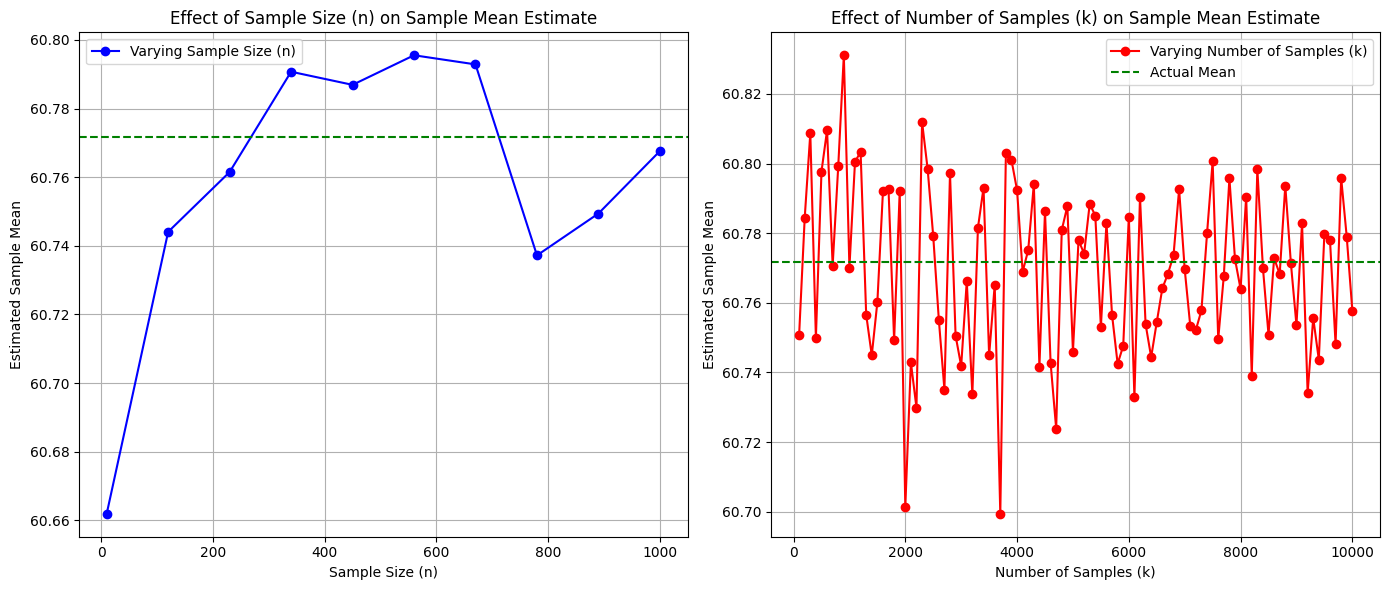

In [ ]:
actual_mean = data['humidity'].mean()
actual_std = data['humidity'].std()

# Define sample sizes and number of samples to test
sample_sizes = np.linspace(10, 1000, 10, dtype=int) # Different values of n
num_samples_list = np.linspace(100, 10000, 100, dtype=int)  # Different values of k

# Fixed parameters
fixed_k = 1000  # Fix num_samples for sample size variation
fixed_n = 100  # Fix sample_size for num_samples variation

# Store results
sample_size_means = []
num_samples_means = []

# Vary sample size (n), fix k
for n in sample_sizes:
    sample_means = [data['humidity'].sample(n, replace=True).mean() for _ in range(fixed_k)]
    sample_size_means.append(np.mean(sample_means))

# Vary number of samples (k), fix n
for k in num_samples_list:
    sample_means = [data['humidity'].sample(fixed_n, replace=True).mean() for _ in range(k)]
    num_samples_means.append(np.mean(sample_means))

# Plot for Sample Size Variation (n)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(sample_sizes, sample_size_means, marker='o', linestyle='-', color='blue', label='Varying Sample Size (n)')
plt.xlabel("Sample Size (n)")
plt.ylabel("Estimated Sample Mean")
plt.title("Effect of Sample Size (n) on Sample Mean Estimate")
plt.grid(True)
plt.legend()
plt.axhline(y=actual_mean, color='green', linestyle='--', label='Actual Mean')


# Plot for Number of Samples Variation (k)
plt.subplot(1, 2, 2)
plt.plot(num_samples_list, num_samples_means, marker='o', linestyle='-', color='red', label='Varying Number of Samples (k)')
plt.xlabel("Number of Samples (k)")
plt.ylabel("Estimated Sample Mean")
plt.title("Effect of Number of Samples (k) on Sample Mean Estimate")
plt.grid(True)
plt.axhline(y=actual_mean, color='green', linestyle='--', label='Actual Mean')
plt.legend()

plt.tight_layout()
plt.show()

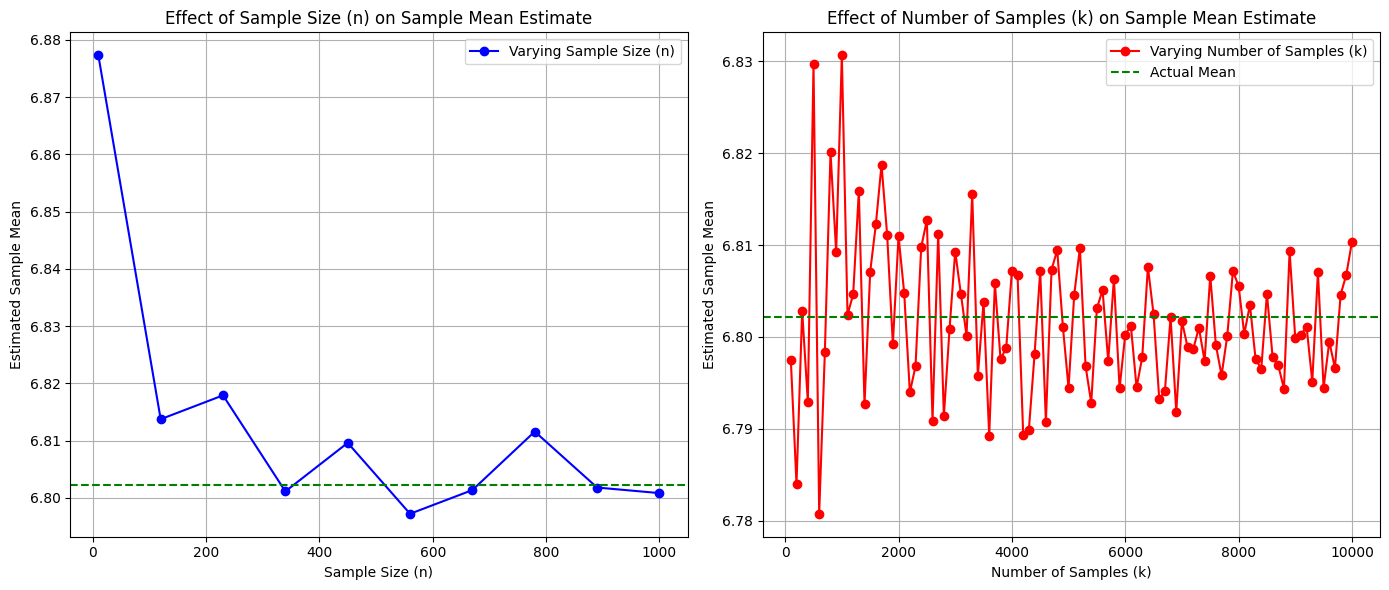

In [ ]:
actual_mean = data['wind_speed'].mean()
actual_std = data['wind_speed'].std()

# Define sample sizes and number of samples to test
sample_sizes = np.linspace(10, 1000, 10, dtype=int) # Different values of n
num_samples_list = np.linspace(100, 10000, 100, dtype=int)  # Different values of k

# Fixed parameters
fixed_k = 1000  # Fix num_samples for sample size variation
fixed_n = 100  # Fix sample_size for num_samples variation

# Store results
sample_size_means = []
num_samples_means = []

# Vary sample size (n), fix k
for n in sample_sizes:
    sample_means = [data['wind_speed'].sample(n, replace=True).mean() for _ in range(fixed_k)]
    sample_size_means.append(np.mean(sample_means))

# Vary number of samples (k), fix n
for k in num_samples_list:
    sample_means = [data['wind_speed'].sample(fixed_n, replace=True).mean() for _ in range(k)]
    num_samples_means.append(np.mean(sample_means))

plt.figure(figsize=(14, 6))

# Plot for Sample Size Variation (n)
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, sample_size_means, marker='o', linestyle='-', color='blue', label='Varying Sample Size (n)')
plt.xlabel("Sample Size (n)")
plt.ylabel("Estimated Sample Mean")
plt.title("Effect of Sample Size (n) on Sample Mean Estimate")
plt.grid(True)
plt.legend()
plt.axhline(y=actual_mean, color='green', linestyle='--', label='Actual Mean')

# Plot for Number of Samples Variation (k)
plt.subplot(1, 2, 2)
plt.plot(num_samples_list, num_samples_means, marker='o', linestyle='-', color='red', label='Varying Number of Samples (k)')
plt.xlabel("Number of Samples (k)")
plt.ylabel("Estimated Sample Mean")
plt.title("Effect of Number of Samples (k) on Sample Mean Estimate")
plt.grid(True)
plt.axhline(y=actual_mean, color='green', linestyle='--', label='Actual Mean')
plt.legend()

plt.tight_layout()
plt.show()

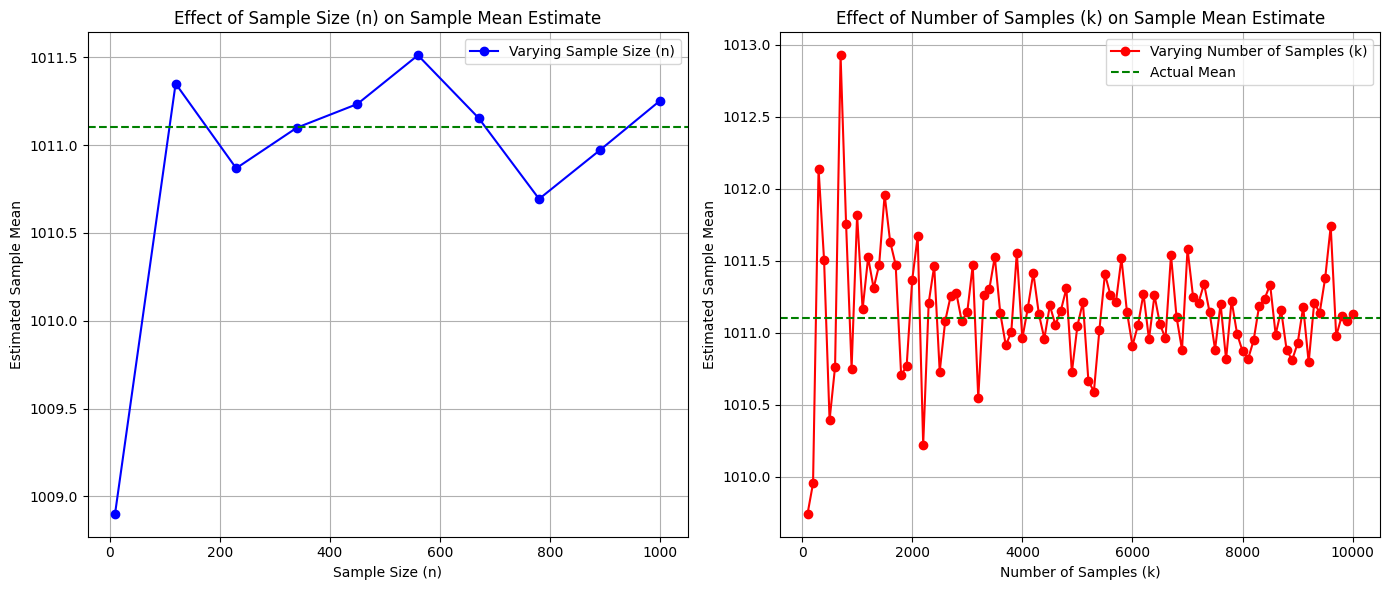

In [ ]:
actual_mean = data['meanpressure'].mean()
actual_std = data['meanpressure'].std()

# Define sample sizes and number of samples to test
sample_sizes = np.linspace(10, 1000, 10, dtype=int) # Different values of n
num_samples_list = np.linspace(100, 10000, 100, dtype=int)  # Different values of k

# Fixed parameters
fixed_k = 1000  # Fix num_samples for sample size variation
fixed_n = 100  # Fix sample_size for num_samples variation

# Store results
sample_size_means = []
num_samples_means = []

# Vary sample size (n), fix k
for n in sample_sizes:
    sample_means = [data['meanpressure'].sample(n, replace=True).mean() for _ in range(fixed_k)]
    sample_size_means.append(np.mean(sample_means))

# Vary number of samples (k), fix n
for k in num_samples_list:
    sample_means = [data['meanpressure'].sample(fixed_n, replace=True).mean() for _ in range(k)]
    num_samples_means.append(np.mean(sample_means))

plt.figure(figsize=(14, 6))

# Plot for Sample Size Variation (n)
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, sample_size_means, marker='o', linestyle='-', color='blue', label='Varying Sample Size (n)')
plt.xlabel("Sample Size (n)")
plt.ylabel("Estimated Sample Mean")
plt.title("Effect of Sample Size (n) on Sample Mean Estimate")
plt.grid(True)
plt.legend()
plt.axhline(y=actual_mean, color='green', linestyle='--', label='Actual Mean')

# Plot for Number of Samples Variation (k)
plt.subplot(1, 2, 2)
plt.plot(num_samples_list, num_samples_means, marker='o', linestyle='-', color='red', label='Varying Number of Samples (k)')
plt.xlabel("Number of Samples (k)")
plt.ylabel("Estimated Sample Mean")
plt.title("Effect of Number of Samples (k) on Sample Mean Estimate")
plt.grid(True)
plt.axhline(y=actual_mean, color='green', linestyle='--', label='Actual Mean')
plt.legend()

plt.tight_layout()
plt.show()

# **Data Observations**

In [ ]:
data['year'] = data['date'].dt.year
data1 = data[data['year'] != 2017]

hottest_days = data1.loc[data1.groupby('year')['meantemp'].idxmax()]
coldest_days = data1.loc[data1.groupby('year')['meantemp'].idxmin()]
high_humidity_days = data[data['humidity'] > 80]

hottest_days_table = PrettyTable()
hottest_days_table.field_names = hottest_days.columns.tolist()
for _, row in hottest_days.iterrows():
    hottest_days_table.add_row(row.tolist())

coldest_days_table = PrettyTable()
coldest_days_table.field_names = coldest_days.columns.tolist()
for _, row in coldest_days.iterrows():
    coldest_days_table.add_row(row.tolist())

high_humidity_days_table = PrettyTable()
high_humidity_days_table.field_names = high_humidity_days.columns.tolist()
for _, row in high_humidity_days.iterrows():
    high_humidity_days_table.add_row(row.tolist())

# Printing
print("\nHottest Day every year from the data:")
print(hottest_days_table)

print("\nColdest Day every year from the data:")
print(coldest_days_table)

print("\nDays with Humidity > 80%:")
print(high_humidity_days_table)


Hottest Day every year from the data:
+---------------------+-------------------+--------------------+--------------------+-------------------+-------+---------------+-------------------+---------------+-------------------+------+
|         date        |      meantemp     |      humidity      |     wind_speed     |    meanpressure   | month | temp_category | humidity_category | wind_category | pressure_category | year |
+---------------------+-------------------+--------------------+--------------------+-------------------+-------+---------------+-------------------+---------------+-------------------+------+
| 2013-05-25 00:00:00 | 38.71428571428572 | 22.428571428571427 | 10.314285714285717 | 998.1428571428572 |   5   |   Very High   |      Very Low     |      Low      |      Very Low     | 2013 |
| 2014-06-07 00:00:00 |        38.5       |       22.75        |      13.1875       |       994.0       |   6   |   Very High   |      Very Low     |      Low      |      Very Low     | 201

**Hottest Days Occur in May/June** :
The hottest days each year consistently fall in May or June.

**Coldest Days in Winter** :
The coldest days are mostly in January, with temperatures ranging from 6.00°C to 11.19°C, and are associated with high humidity (86-100%) and low wind speeds.

**High Humidity Days in Winter and Monsoon** :
Days with humidity > 80% are most frequent during winter (Dec-Feb) and monsoon (Jul-Aug), with temperatures ranging from 7.40°C to 29.00°C.

**Inverse Relationship Between Temperature and Humidity** :
Higher temperatures correlate with lower humidity (22-26%), while colder temperatures correlate with higher humidity (86-100%).

**Moderate Wind Speeds on Hottest Days** :
On the hottest days, wind speeds are moderate (10-15 km/h), while on high humidity days, wind speeds vary widely (0-15 km/h), with lower speeds during winter.


Correlation Matrix:
              meantemp  humidity  wind_speed  meanpressure
meantemp      1.000000 -0.571951    0.306468     -0.038818
humidity     -0.571951  1.000000   -0.373972      0.001734
wind_speed    0.306468 -0.373972    1.000000     -0.020670
meanpressure -0.038818  0.001734   -0.020670      1.000000


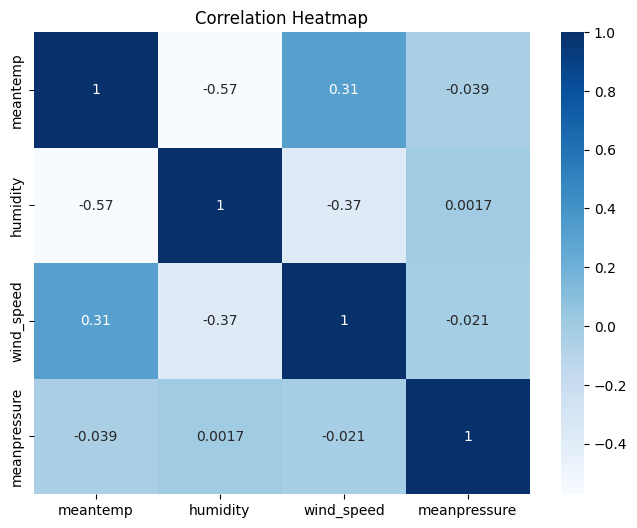

In [ ]:
correlation_matrix = data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

**Temperature vs. Humidity**

*   Correlation Value: -0.57
*   Observation: There is a moderate negative correlation between temperature and humidity. As temperature increases, humidity tends to decrease, and vice versa. This aligns with the general trend that hotter days are often drier, while colder days are more humid.

**Temperature vs. Wind Speed**

*   Correlation Value: 0.31
*   Observation: There is a weak positive correlation between temperature and wind speed.Higher temperatures are slightly associated with higher wind speeds, though the relationship is not strong. This could indicate that warmer days might experience slightly breezier conditions.

**Humidity vs. Wind Speed**

*   Correlation Value: -0.37
*   Observation: There is a weak to moderate negative correlation between humidity and wind speed. Higher humidity tends to occur with lower wind speeds, and vice versa. This suggests that calm conditions (low wind speeds) are often associated with higher humidity, such as during winter or monsoon seasons.

**Mean Pressure vs. Other Variables**

*   Correlation Values: Temperature: -0.04, Humidity: 0.002, Wind Speed: -0.02
*   Observation: Mean pressure shows almost no correlation with temperature, humidity, or wind speed. This indicates that mean pressure is largely independent of these variables in the dataset. Pressure is likely influenced by other factors not captured here.

**Strongest Relationships**

The strongest correlations in the dataset are:

*   Temperature vs. Humidity: -0.57 (moderate negative correlation).
*   Humidity vs. Wind Speed: -0.37 (weak to moderate negative correlation).
*   Temperature vs. Wind Speed: 0.31 (weak positive correlation).

**Takeaways**

*   Temperature and Humidity: These two variables have the strongest relationship, with higher temperatures linked to lower humidity.
*   Wind Speed: Wind speed has a weak relationship with both temperature and humidity, suggesting it plays a secondary role in this dataset.
*   Mean Pressure: Mean pressure is largely unrelated to the other variables, indicating it may be influenced by external factors.


Yearly Average Temperature:
year
2013    24.791494
2014    25.010673
2015    25.114591
2016    27.103373


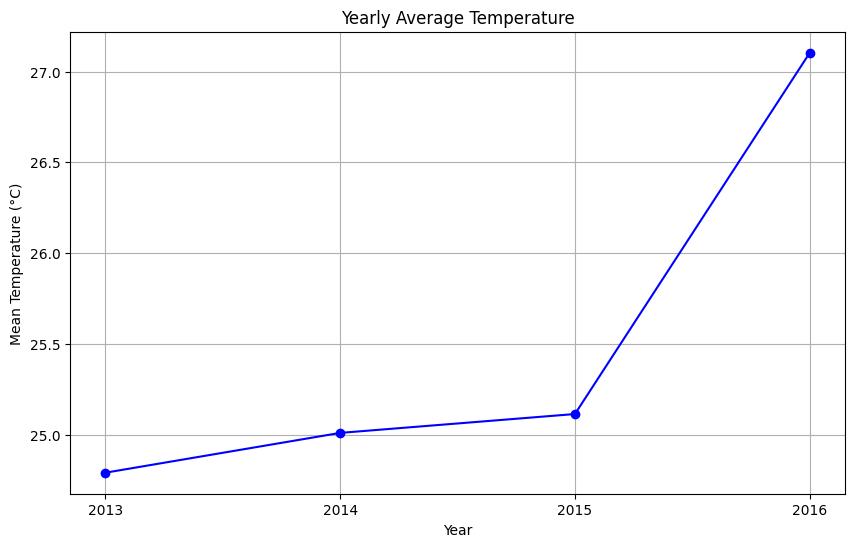

In [ ]:
data1 = data[data['year'] != 2017]

yearly_avg_temp = data1.groupby('year')['meantemp'].mean()
print("\nYearly Average Temperature:")
print(yearly_avg_temp.to_string())

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_temp.index, yearly_avg_temp.values, marker='o', linestyle='-', color='b')
plt.title('Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(yearly_avg_temp.index)  # Ensure only integer years appear
plt.grid(True)
plt.show()

## Yearly Average Temperature Trend

The average temperature increases each year:

*   2013: 24.79°C
*   2014: 25.01°C
*   2015: 25.11°C
*   2016: 27.10°C

## Observation:
There is a clear upward trend in average temperatures from 2013 to 2016. The year 2016 stands out with a significant jump in temperature (27.10°C), which is much higher than the previous years.

## Key Takeaways

*   Temperature Rise: The data suggests a warming trend over the years, with 2016 being noticeably hotter.
*   Significance of 2016: The sharp increase in temperature in 2016 could indicate an anomaly or the start of a new trend.

In [ ]:
mean_temp = data['meantemp'].mean()
std_temp = data['meantemp'].std()
anomalies = data[(data['meantemp'] < mean_temp - 2 * std_temp) | (data['meantemp'] > mean_temp + 2 * std_temp)]

temp_anomalies_table = PrettyTable()
temp_anomalies_table.field_names = anomalies.columns.tolist()
for _, row in anomalies.iterrows():
    temp_anomalies_table.add_row(row.tolist())

print("\nTemperature Anomalies:")
print(temp_anomalies_table)


Temperature Anomalies:
+---------------------+--------------------+-------------------+--------------------+--------------------+-------+---------------+-------------------+---------------+-------------------+------+
|         date        |      meantemp      |      humidity     |     wind_speed     |    meanpressure    | month | temp_category | humidity_category | wind_category | pressure_category | year |
+---------------------+--------------------+-------------------+--------------------+--------------------+-------+---------------+-------------------+---------------+-------------------+------+
| 2013-01-01 00:00:00 |        10.0        |        84.5       |        0.0         | 1015.6666666666666 |   1   |    Very Low   |     Very High     |    Very Low   |      Very Low     | 2013 |
| 2013-01-02 00:00:00 |        7.4         |        92.0       |        2.98        |       1017.8       |   1   |    Very Low   |     Very High     |    Very Low   |      Very Low     | 2013 |
| 2013

*  For the dataset we have taken, all anomalies are unusually cold days, as no days exceed the upper threshold.

*  All anomalies occured in winter (December and January).

*  Temperature range : Anomalies range from 6.00°C to 10.75°C, with the coldest being 6.00°C on 2013-01-05.

*  Humidity is moderate to high (63.71% to 100%) during anomalies.

*  Wind speeds are low to moderate (0.00 km/h to 8.10 km/h), indicating calm or slightly breezy conditions which resembles general winter patterns.
